In [85]:
import pandas as pd
import numpy as np
from utils import adstock, s_curve, create_transformed_tables, plot_stacked_area_with_actual, plot_transformed_vs_raw, plot_data_set
import pandas as pd

### Create a DataFrame with 3 Years of Weekly Data

This cell generates a DataFrame with 156 weeks (3 years), where the first column is a cyclical variable based on a sine wave that repeats each year.


In [86]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar

# Number of years and weeks per year
years = 3
weeks_per_year = 52
n_weeks = years * weeks_per_year

# Generate week numbers
week = np.arange(n_weeks)

# Sine wave: one cycle per year
sine_wave = np.sin(2 * np.pi * (week % weeks_per_year) / weeks_per_year)

# Create date range starting from 1/1/22, weekly frequency
start_date = '2022-01-01'
dates = pd.date_range(start=start_date, periods=n_weeks, freq='W-SAT')

# Price pattern: repeat [5, 6, 5.5, 4] to fill n_weeks
price_pattern = [5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5.5,5.5,4,4,4,4,4,4,4,4,4,4,4,4]
price = np.resize(price_pattern, n_weeks)

distribution = np.full(n_weeks, 0.2)
distribution[n_weeks//2:] = 0.3

# Set max value for media variables
max_grp = 100

# Media variables: each is random 0-max_grp for a 3-month block, rest 0
media1 = np.zeros(n_weeks)
media2 = np.zeros(n_weeks)
media3 = np.zeros(n_weeks)

block_len = 13  # ~3 months (weeks)
media1[:block_len] = np.random.uniform(0, max_grp, block_len)
media2[block_len:2*block_len] = np.random.uniform(0, max_grp, block_len)
media3[2*block_len:3*block_len] = np.random.uniform(0, max_grp, block_len)

block_len = 8  # 2 months (weeks)
start_period = 52
media1[start_period:block_len+start_period] = np.random.uniform(0, max_grp, block_len)
media2[start_period+block_len:start_period+2*block_len] = np.random.uniform(0, max_grp, block_len)
media3[start_period+2*block_len:start_period+3*block_len] = np.random.uniform(0, max_grp, block_len)

start_period = 104
media1[start_period:block_len+start_period] = np.random.uniform(0, max_grp, block_len)
media2[start_period+block_len:start_period+2*block_len] = np.random.uniform(0, max_grp, block_len)
media3[start_period+2*block_len:start_period+3*block_len] = np.random.uniform(0, max_grp, block_len)

# Create US public holiday variable (1 for holiday week, 0 otherwise, Xmas=3, Black Friday=2)
us_holidays = USFederalHolidayCalendar().holidays(start=dates.min(), end=dates.max())
holiday_var = np.zeros(n_weeks, dtype=int)

for i, dt in enumerate(dates):
    
    # Other US federal holidays
    if any((d in us_holidays) for d in pd.date_range(dt - pd.Timedelta(days=6), dt, freq='D')):
        holiday_var[i] = 1
    # Christmas (Xmas): Dec 25, assign 3 if week contains Dec 25
    week_days = pd.date_range(dt - pd.Timedelta(days=6), dt, freq='D')
    if any((d.month == 12 and d.day == 25) for d in week_days):
        holiday_var[i] = 3
        continue
    # Black Friday: Friday after 4th Thursday in November
    # Find Thanksgiving (4th Thursday in Nov)
    if dt.month == 11:
        # Find all Thursdays in November
        thursdays = [d for d in pd.date_range(dt.replace(day=1), dt.replace(day=30), freq='W-THU') if d.month == 11]
        if len(thursdays) >= 4:
            thanksgiving = thursdays[3]
            black_friday = thanksgiving + pd.Timedelta(days=1)
            # Assign 2 if week contains Black Friday
            if any((d.month == 11 and d.day == black_friday.day) for d in pd.date_range(dt - pd.Timedelta(days=6), dt, freq='D')):
                holiday_var[i] = 2
                continue
df_data = pd.DataFrame({
    'c':1,
    'seasonality': sine_wave,
    'holidays': holiday_var,
    'price': price,
    'distribution': distribution,
    'media1': media1,
    'media2': media2,
    'media3': media3,
    'error':np.random.normal(0, 1, n_weeks)
}, index=dates)

# df_data.head()



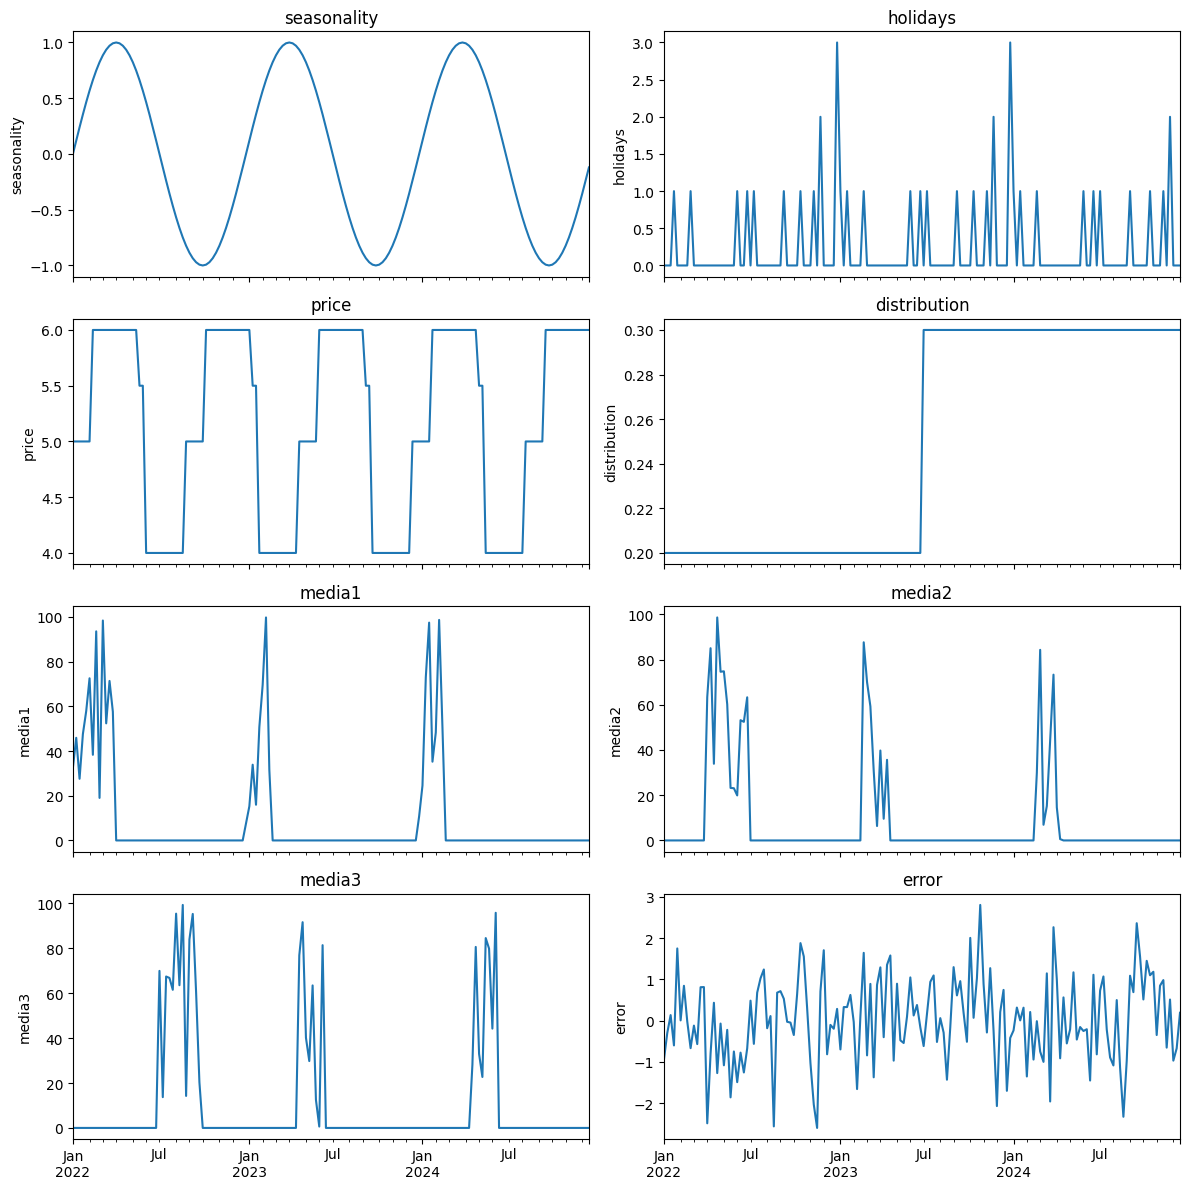

In [87]:
plot_data_set(df_data)

In [88]:
import os
# Ensure Data folder exists
os.makedirs('Data', exist_ok=True)

# Save dataframes as CSV
if 'df_data' in globals():
    df_data.to_csv('Data/df_data.csv')
